In [2]:
import pandas as pd
import numpy as np
import gc
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid',font_scale=1.5)
import plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import Scatter
pyplot=py.offline.iplot
plt.rcParams['font.sans-serif']=['SimHei']#解决中文乱码
plt.rcParams['axes.unicode_minus']=False#解决符号乱码

In [3]:
labels = pd.read_csv('./JD_labels.csv',dtype={'customer_id':str})
short=pd.read_csv('./df_short.csv',dtype={'customer_id':str,'product_id':str})

In [4]:
labels.head()

,Unnamed: 0,customer_id,time_browse,time_Order,cate_most_browse,cate_most_Follow,cate_most_SavedCart,cate_most_Order,month_buy,month_Cart,...,week_buy,week_Cart,week_active,last_browse,last_SavedCart,last_Order,interval_buy,browse_not_buy,cart_not_buy,buy_again
0,0,1174854,上午,NaN,Phone,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,39.0,NaN,NaN,NaN,是,是,未购买
1,1,455341,下午,NaN,Coat,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,23.0,NaN,NaN,NaN,是,是,未购买
2,2,478893,上午,NaN,Air Conditioner,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,28.0,NaN,NaN,NaN,是,是,未购买
3,3,95399,晚上,NaN,Phone,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,16.0,NaN,NaN,NaN,是,是,未购买
4,4,746439,晚上,NaN,Milk Power,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,48.0,NaN,NaN,NaN,是,是,未购买


# 数据预处理

In [11]:
labels.isnull()

,Unnamed: 0,customer_id,time_browse,time_Order,cate_most_browse,cate_most_Follow,cate_most_SavedCart,cate_most_Order,month_buy,month_Cart,...,week_buy,week_Cart,week_active,last_browse,last_SavedCart,last_Order,interval_buy,browse_not_buy,cart_not_buy,buy_again
0,False,False,False,True,False,True,True,True,True,True,...,True,True,True,False,True,True,True,False,False,False
1,False,False,False,True,False,True,True,True,True,True,...,True,True,False,False,True,True,True,False,False,False
2,False,False,False,True,False,True,True,True,True,True,...,True,True,False,False,True,True,True,False,False,False
3,False,False,False,True,False,True,True,True,True,True,...,True,True,False,False,True,True,True,False,False,False
4,False,False,False,True,False,True,True,True,True,True,...,True,True,True,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48998,False,False,False,True,False,True,True,True,True,True,...,True,True,False,False,True,True,True,False,False,False
48999,False,False,False,True,False,True,True,True,True,True,...,True,True,False,False,True,True,True,False,False,False
49000,False,False,False,True,False,True,True,True,True,True,...,True,True,False,False,True,True,True,False,False,False
49001,False,False,False,True,False,True,True,True,True,True,...,True,True,False,False,True,True,True,False,False,False


In [12]:
labels.isnull().mean()

Unnamed: 0             0.000000
customer_id            0.000000
time_browse            0.112932
time_Order             0.935269
cate_most_browse       0.112932
cate_most_Follow       0.985919
cate_most_SavedCart    0.981103
cate_most_Order        0.935269
month_buy              0.972287
month_Cart             0.981103
month_active           0.598820
week_buy               0.992960
week_Cart              0.981103
week_active            0.598820
last_browse            0.112932
last_SavedCart         0.981103
last_Order             0.935269
interval_buy           0.999857
browse_not_buy         0.000000
cart_not_buy           0.000000
buy_again              0.000000
dtype: float64

In [21]:
u = labels.mean() 
labels.fillna(u,inplace = True)
labels

,Unnamed: 0,customer_id,time_browse,time_Order,cate_most_browse,cate_most_Follow,cate_most_SavedCart,cate_most_Order,month_buy,month_Cart,...,week_buy,week_Cart,week_active,last_browse,last_SavedCart,last_Order,interval_buy,browse_not_buy,cart_not_buy,buy_again
0,0,1174854,上午,NaN,Phone,NaN,NaN,NaN,1.001473,1.0054,...,1.002899,1.0054,1.069688,39.000000,3.585313,36.052963,23.285714,是,是,未购买
1,1,455341,下午,NaN,Coat,NaN,NaN,NaN,1.001473,1.0054,...,1.002899,1.0054,1.000000,23.000000,3.585313,36.052963,23.285714,是,是,未购买
2,2,478893,上午,NaN,Air Conditioner,NaN,NaN,NaN,1.001473,1.0054,...,1.002899,1.0054,1.000000,28.000000,3.585313,36.052963,23.285714,是,是,未购买
3,3,95399,晚上,NaN,Phone,NaN,NaN,NaN,1.001473,1.0054,...,1.002899,1.0054,1.000000,16.000000,3.585313,36.052963,23.285714,是,是,未购买
4,4,746439,晚上,NaN,Milk Power,NaN,NaN,NaN,1.001473,1.0054,...,1.002899,1.0054,1.069688,48.000000,3.585313,36.052963,23.285714,是,是,未购买
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48998,48998,907477,下午,NaN,Washing Machine,NaN,NaN,NaN,1.001473,1.0054,...,1.002899,1.0054,1.000000,30.000000,3.585313,36.052963,23.285714,是,是,未购买
48999,48999,818997,上午,NaN,Necklace,NaN,NaN,NaN,1.001473,1.0054,...,1.002899,1.0054,1.000000,23.000000,3.585313,36.052963,23.285714,是,是,未购买
49000,49000,771488,上午,NaN,Eye Shadow,NaN,NaN,NaN,1.001473,1.0054,...,1.002899,1.0054,1.000000,26.000000,3.585313,36.052963,23.285714,是,是,未购买
49001,49001,739636,上午,NaN,Tea,NaN,NaN,NaN,1.001473,1.0054,...,1.002899,1.0054,1.000000,22.000000,3.585313,36.052963,23.285714,是,是,未购买


In [27]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49003 entries, 0 to 49002
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           49003 non-null  int64  
 1   customer_id          49003 non-null  object 
 2   time_browse          43469 non-null  object 
 3   time_Order           3172 non-null   object 
 4   cate_most_browse     43469 non-null  object 
 5   cate_most_Follow     690 non-null    object 
 6   cate_most_SavedCart  926 non-null    object 
 7   cate_most_Order      3172 non-null   object 
 8   month_buy            49003 non-null  float64
 9   month_Cart           49003 non-null  float64
 10  month_active         49003 non-null  float64
 11  week_buy             49003 non-null  float64
 12  week_Cart            49003 non-null  float64
 13  week_active          49003 non-null  float64
 14  last_browse          49003 non-null  float64
 15  last_SavedCart       49003 non-null 

In [28]:
labels.describe()

,Unnamed: 0,month_buy,month_Cart,month_active,week_buy,week_Cart,week_active,last_browse,last_SavedCart,last_Order,interval_buy
count,49003.000000,49003.000000,49003.000000,49003.000000,49003.000000,49003.000000,49003.000000,49003.000000,49003.000000,49003.000000,49003.000000
mean,24501.000000,1.001473,1.005400,1.069688,1.002899,1.005400,1.069688,38.574363,3.585313,36.052963,23.285714
std,14146.091957,0.006384,0.010074,0.215635,0.004511,0.010074,0.215635,20.645078,0.306946,5.497247,0.211956
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5.000000
25%,12250.500000,1.001473,1.005400,1.000000,1.002899,1.005400,1.000000,23.000000,3.585313,36.052963,23.285714
50%,24501.000000,1.001473,1.005400,1.069688,1.002899,1.005400,1.069688,38.574363,3.585313,36.052963,23.285714
75%,36751.500000,1.001473,1.005400,1.069688,1.002899,1.005400,1.069688,55.000000,3.585313,36.052963,23.285714
max,49002.000000,2.000000,2.000000,9.000000,2.000000,2.000000,9.000000,73.000000,7.000000,73.000000,62.000000


目前来看，labels这个数据集，经过使用均值插值的方法进行预处理之后，没有明显的异常值，故该数据集处理结束。

In [30]:
short.isnull()#没有缺失值

,Unnamed: 0,customer_id,product_id,type,brand,category,shop_category,date,year,month,day
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
55143,False,False,False,False,False,False,False,False,False,False,False
55144,False,False,False,False,False,False,False,False,False,False,False
55145,False,False,False,False,False,False,False,False,False,False,False
55146,False,False,False,False,False,False,False,False,False,False,False


In [24]:
short['date']=pd.to_datetime(short['date'])#日期转换
short['year'],short['month'],short['day']=short['date'].dt.year,short['date'].dt.month,short['date'].dt.day
short.sort_values(by='date',ascending=True,inplace=True)#以日期做排序
short

,Unnamed: 0,customer_id,product_id,type,brand,category,shop_category,date,year,month,day
41047,63571,13425,19668,1,Lipton,Tea,Food,2018-02-01,2018,2,1
30228,28659,123145,158628,1,Other,Phone,Electronics,2018-02-01,2018,2,1
24682,67745,947227,369669,1,Sony,Digital Camera,Electronics,2018-02-01,2018,2,1
24720,173559,503323,21286,1,Huawei,Tablet,Electronics,2018-02-01,2018,2,1
29738,120418,1157186,155277,1,Apple,Phone,Electronics,2018-02-01,2018,2,1
...,...,...,...,...,...,...,...,...,...,...,...
38130,94747,54096,180148,2,Midea,Induction Cooker,Household Eletric Appliance,2018-04-15,2018,4,15
48099,70776,1475274,192287,1,Chow Tai Fook,Necklace,Jewellery Accessories,2018-04-15,2018,4,15
16421,104950,1279419,161727,1,Other,Candy,Food,2018-04-15,2018,4,15
51315,125376,1524918,49006,1,Huawei,Tablet,Electronics,2018-04-15,2018,4,15


In [26]:
short.reset_index(drop=True,inplace=True)#重置索引
short

,Unnamed: 0,customer_id,product_id,type,brand,category,shop_category,date,year,month,day
0,63571,13425,19668,1,Lipton,Tea,Food,2018-02-01,2018,2,1
1,28659,123145,158628,1,Other,Phone,Electronics,2018-02-01,2018,2,1
2,67745,947227,369669,1,Sony,Digital Camera,Electronics,2018-02-01,2018,2,1
3,173559,503323,21286,1,Huawei,Tablet,Electronics,2018-02-01,2018,2,1
4,120418,1157186,155277,1,Apple,Phone,Electronics,2018-02-01,2018,2,1
...,...,...,...,...,...,...,...,...,...,...,...
55143,94747,54096,180148,2,Midea,Induction Cooker,Household Eletric Appliance,2018-04-15,2018,4,15
55144,70776,1475274,192287,1,Chow Tai Fook,Necklace,Jewellery Accessories,2018-04-15,2018,4,15
55145,104950,1279419,161727,1,Other,Candy,Food,2018-04-15,2018,4,15
55146,125376,1524918,49006,1,Huawei,Tablet,Electronics,2018-04-15,2018,4,15


In [31]:
short.head(5)

,Unnamed: 0,customer_id,product_id,type,brand,category,shop_category,date,year,month,day
0,63571,13425,19668,1,Lipton,Tea,Food,2018-02-01,2018,2,1
1,28659,123145,158628,1,Other,Phone,Electronics,2018-02-01,2018,2,1
2,67745,947227,369669,1,Sony,Digital Camera,Electronics,2018-02-01,2018,2,1
3,173559,503323,21286,1,Huawei,Tablet,Electronics,2018-02-01,2018,2,1
4,120418,1157186,155277,1,Apple,Phone,Electronics,2018-02-01,2018,2,1


In [32]:
short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55148 entries, 0 to 55147
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Unnamed: 0     55148 non-null  int64         
 1   customer_id    55148 non-null  object        
 2   product_id     55148 non-null  object        
 3   type           55148 non-null  int64         
 4   brand          55148 non-null  object        
 5   category       55148 non-null  object        
 6   shop_category  55148 non-null  object        
 7   date           55148 non-null  datetime64[ns]
 8   year           55148 non-null  int64         
 9   month          55148 non-null  int64         
 10  day            55148 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 4.6+ MB


In [33]:
short.describe()

,Unnamed: 0,type,year,month,day
count,55148.000000,55148.000000,55148.0,55148.000000,55148.000000
mean,91949.395608,1.305614,2018.0,2.790128,12.920124
std,53025.889896,0.922212,0.0,0.743135,8.354647
min,8.000000,1.000000,2018.0,2.000000,1.000000
25%,46221.500000,1.000000,2018.0,2.000000,6.000000
50%,91858.500000,1.000000,2018.0,3.000000,11.000000
75%,137592.500000,1.000000,2018.0,3.000000,20.000000
max,183826.000000,5.000000,2018.0,4.000000,31.000000


short数据集没有缺失值，因为在本数据集中，需要用到用户在具体到某一天的某时间段的分析，所以将日期这一字断进行转换。

# 数据分析

In [51]:
use_or = labels['time_Order'].value_counts()

In [70]:
use_or

晚上       882
下午       869
上午       633
中午       618
凌晨       164
上午,晚上      3
上午,中午      2
中午,下午      1
Name: time_Order, dtype: int64

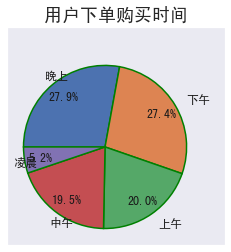

In [74]:
plt.axes(aspect='equal')
plt.xlim(0,4)
plt.ylim(0,4)
plt.pie(x =use_or.iloc[:5].values.tolist(),
        labels= use_or.iloc[:5].index.tolist(),
        autopct='%.1f%%', 
        pctdistance=0.8,  
        labeldistance = 1.15, 
        startangle = 180,
        radius = 1.5,
        counterclock = False, 
        wedgeprops = {'linewidth': 1.5, 'edgecolor':'green'},
        textprops = {'fontsize':12, 'color':'k'}, 
        center = (1.8,1.8),
        frame = 1 )
plt.xticks(())
plt.yticks(())
plt.title('用户下单购买时间')
plt.show()

从上图可以看出，用户的购买时间晚上和下午是最多的，分析原因可能是下午属于工作即将结束以及晚上工作结束后会进行较多的购买，因此建议在下午和晚上进行一些活动，可以提升成交率。凌晨的购买率最低，该时段可减少活动推送。

In [84]:
cate_f= labels['cate_most_Follow'].value_counts()

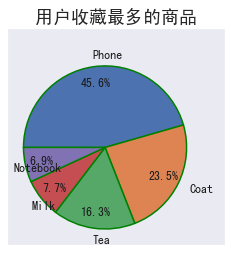

In [85]:
plt.axes(aspect='equal')
plt.xlim(0,4)
plt.ylim(0,4)
plt.pie(x =cate_f.iloc[:5].values.tolist(),
        labels= cate_f.iloc[:5].index.tolist(),
        autopct='%.1f%%', 
        pctdistance=0.8,  
        labeldistance = 1.15, 
        startangle = 180,
        radius = 1.5,
        counterclock = False, 
        wedgeprops = {'linewidth': 1.5, 'edgecolor':'green'},
        textprops = {'fontsize':12, 'color':'k'}, 
        center = (1.8,1.8),
        frame = 1 )
plt.xticks(())
plt.yticks(())
plt.title('用户收藏最多的商品')
plt.show()

用户收藏的最多的是手机和外套，其次是茶。其中手机占比奖金一半，说明用户对该类产品的消费倾向最高，但是考虑到价格因素，所以外套和茶也应该成为重点关注的商品。

In [92]:
cate_o = labels['cate_most_Order'].value_counts()

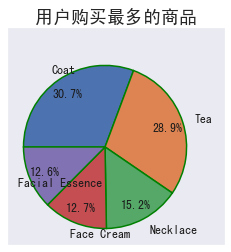

In [93]:
plt.axes(aspect='equal')
plt.xlim(0,4)
plt.ylim(0,4)
plt.pie(x =cate_o.iloc[:5].values.tolist(),
        labels= cate_o.iloc[:5].index.tolist(),
        autopct='%.1f%%', 
        pctdistance=0.8,  
        labeldistance = 1.15, 
        startangle = 180,
        radius = 1.5,
        counterclock = False, 
        wedgeprops = {'linewidth': 1.5, 'edgecolor':'green'},
        textprops = {'fontsize':12, 'color':'k'}, 
        center = (1.8,1.8),
        frame = 1 )
plt.xticks(())
plt.yticks(())
plt.title('用户购买最多的商品')
plt.show()

从图中看出，最终购买成功的商品占比最多的是外套和茶，尽管手机在浏览、收藏和加购中的占比最高，但是购买率却非常低，因此建议针对手机部分进行活动可以有效提升顾客的购买率。

In [89]:
cate_s = labels['cate_most_SavedCart'].value_counts()

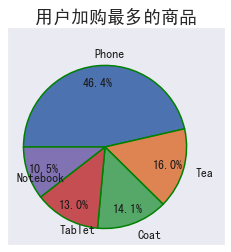

In [90]:
plt.axes(aspect='equal')
plt.xlim(0,4)
plt.ylim(0,4)
plt.pie(x =cate_s.iloc[:5].values.tolist(),
        labels= cate_s.iloc[:5].index.tolist(),
        autopct='%.1f%%', 
        pctdistance=0.8,  
        labeldistance = 1.15, 
        startangle = 180,
        radius = 1.5,
        counterclock = False, 
        wedgeprops = {'linewidth': 1.5, 'edgecolor':'green'},
        textprops = {'fontsize':12, 'color':'k'}, 
        center = (1.8,1.8),
        frame = 1 )
plt.xticks(())
plt.yticks(())
plt.title('用户加购最多的商品')
plt.show()

In [95]:
cate_b = labels['cate_most_browse'].value_counts()

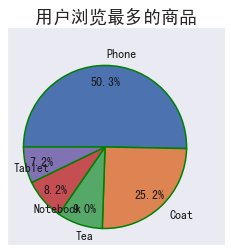

In [96]:
plt.axes(aspect='equal')
plt.xlim(0,4)
plt.ylim(0,4)
plt.pie(x =cate_b.iloc[:5].values.tolist(),
        labels= cate_b.iloc[:5].index.tolist(),
        autopct='%.1f%%', 
        pctdistance=0.8,  
        labeldistance = 1.15, 
        startangle = 180,
        radius = 1.5,
        counterclock = False, 
        wedgeprops = {'linewidth': 1.5, 'edgecolor':'green'},
        textprops = {'fontsize':12, 'color':'k'}, 
        center = (1.8,1.8),
        frame = 1 )
plt.xticks(())
plt.yticks(())
plt.title('用户浏览最多的商品')
plt.show()

In [100]:
use_buy_m = labels['month_buy'].value_counts()
use_buy_m

1.001473    47645
1.000000     1356
2.000000        2
Name: month_buy, dtype: int64

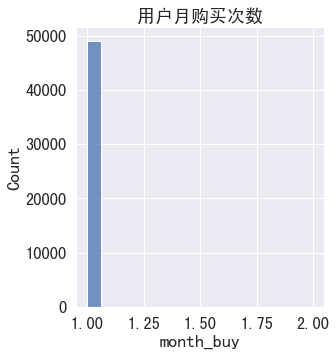

In [102]:
sns.displot(labels['month_buy'])
plt.title('用户月购买次数')
plt.show()

In [103]:
use_buy_w = labels['week_buy'].value_counts()
use_buy_w

1.002899    48658
1.000000      344
2.000000        1
Name: week_buy, dtype: int64

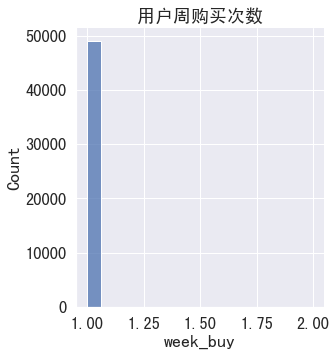

In [104]:
sns.displot(labels['week_buy'])
plt.title('用户周购买次数')
plt.show()

从月购买次数和周购买次数来看，用户基本的购买次数都保持在一次。

In [106]:
last_o = labels['last_Order'].value_counts()
last_b = labels['last_browse'].value_counts().sort_index()
last_s  = labels['last_SavedCart'].value_counts().sort_index()

Text(0.5, 1.0, '浏览、加购和下单距离上次操作时间的对比')

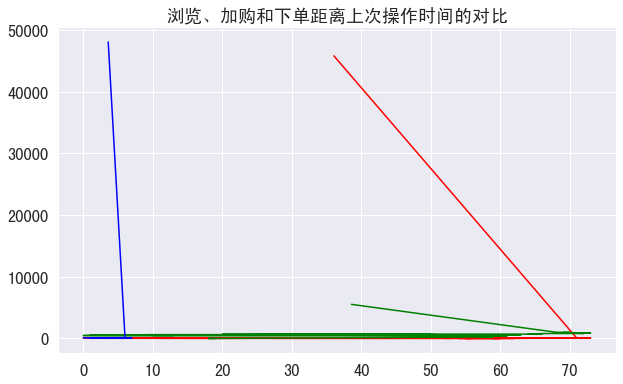

In [126]:
fig = plt.figure(figsize=(10,6))
plt.plot(last_o,
         color = 'red',
         label = '下单时间') 
plt.plot(last_b,
         color = 'green', 
         label = '浏览时间') 
plt.plot(last_s,
         color = 'blue', 
         label = '加购时间') 
plt.title('浏览、加购和下单距离上次操作时间的对比')

经过对比发现，用户在距离上一次操作后的30到60天会开始有下一次的操作，建议在用户上一次的操作一个月后开始加大推送。

In [131]:
buy_again = labels['buy_again'].value_counts()
buy_again
h = 8/(45831+3164+8)
print(h)

0.00016325531089933268


<AxesSubplot:>

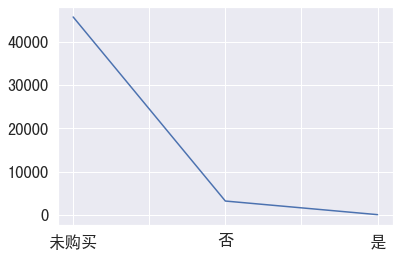

In [130]:
buy_again.plot()

由上图看出，复购率占比很低，几乎为0。

In [169]:
b_not_o = labels['browse_not_buy'].value_counts()
print(b_not_o)
print(5538/(43465+5538))

是    43465
否     5538
Name: browse_not_buy, dtype: int64
0.11301348897006305


In [170]:
c_not_o = labels['cart_not_buy'].value_counts()
print(c_not_o)
print(5536/(43467+5536))

是    43467
否     5536
Name: cart_not_buy, dtype: int64
0.11297267514233822


以上两个分析可以看出，用户的浏览和加购并不能代表顾客的需求，两者向购买的转化率都处于百分之十的水平。但是由于数据原因，有条件可以对比购买商品和加购商品是否属于同一类型，若不是，有理由分析加购的和浏览的商品是用户目标商品，可针对做出推广。

In [132]:
sh_brand = short['brand'].value_counts()
sh_brand

Other        13319
Huawei        5914
Apple         5635
Lipton        3059
Sumsung       1512
             ...  
Sulwhasoo       36
Danisa          34
Oreo            30
Calbee          29
Anta             8
Name: brand, Length: 72, dtype: int64

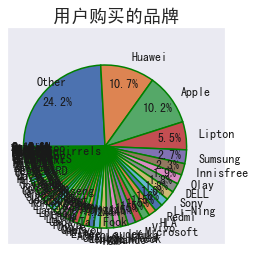

In [137]:
plt.axes(aspect='equal')
plt.xlim(0,4)
plt.ylim(0,4)
plt.pie(x =sh_brand,
        labels= sh_brand.index,
        autopct='%.1f%%', 
        pctdistance=0.8,  
        labeldistance = 1.15, 
        startangle = 180,
        radius = 1.5,
        counterclock = False, 
        wedgeprops = {'linewidth': 1.5, 'edgecolor':'green'},
        textprops = {'fontsize':12, 'color':'k'}, 
        center = (1.8,1.8),
        frame = 1 )
plt.xticks(())
plt.yticks(())
plt.title('用户购买的品牌')
plt.show()

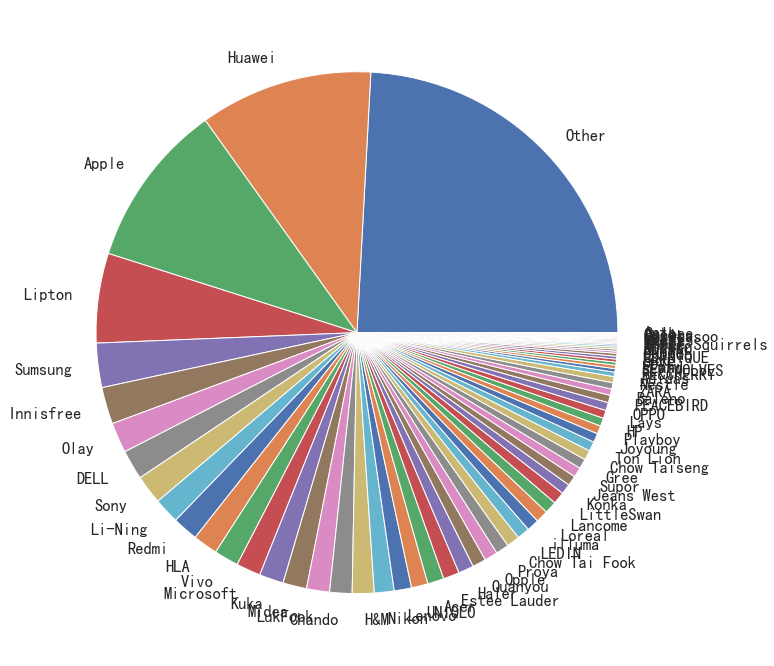

In [179]:
plt.figure(figsize=(16,12))
plt.pie(sh_brand,labels=sh_brand.index)
plt.show()

在用户购买的品牌中，除了other是占比最多之外，更多的是华为、苹果等电子产品的品牌，说明用户对于京东的电子产品信赖度很高，可以就电子产品做出推广。其次是占比最多的other，这里表明用户可能更多会选择一些小众的品牌满足自己的需要，建议提升小众品牌的容纳量。

In [139]:
sh_cate = short['category'].value_counts()

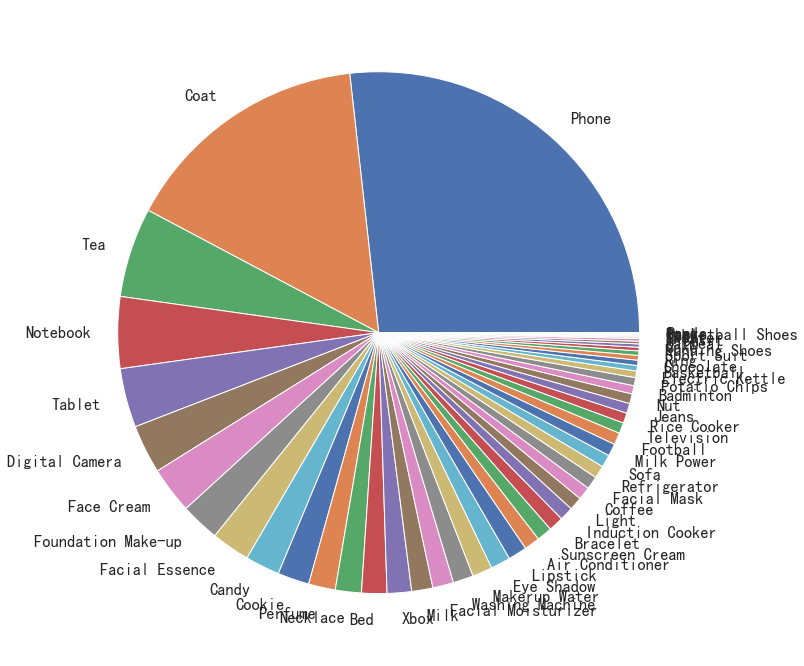

In [177]:
plt.figure(figsize=(16,12))
plt.pie(sh_cate,labels=sh_cate.index)
plt.show()

Text(0.5, 1.0, '用户购买的种类')

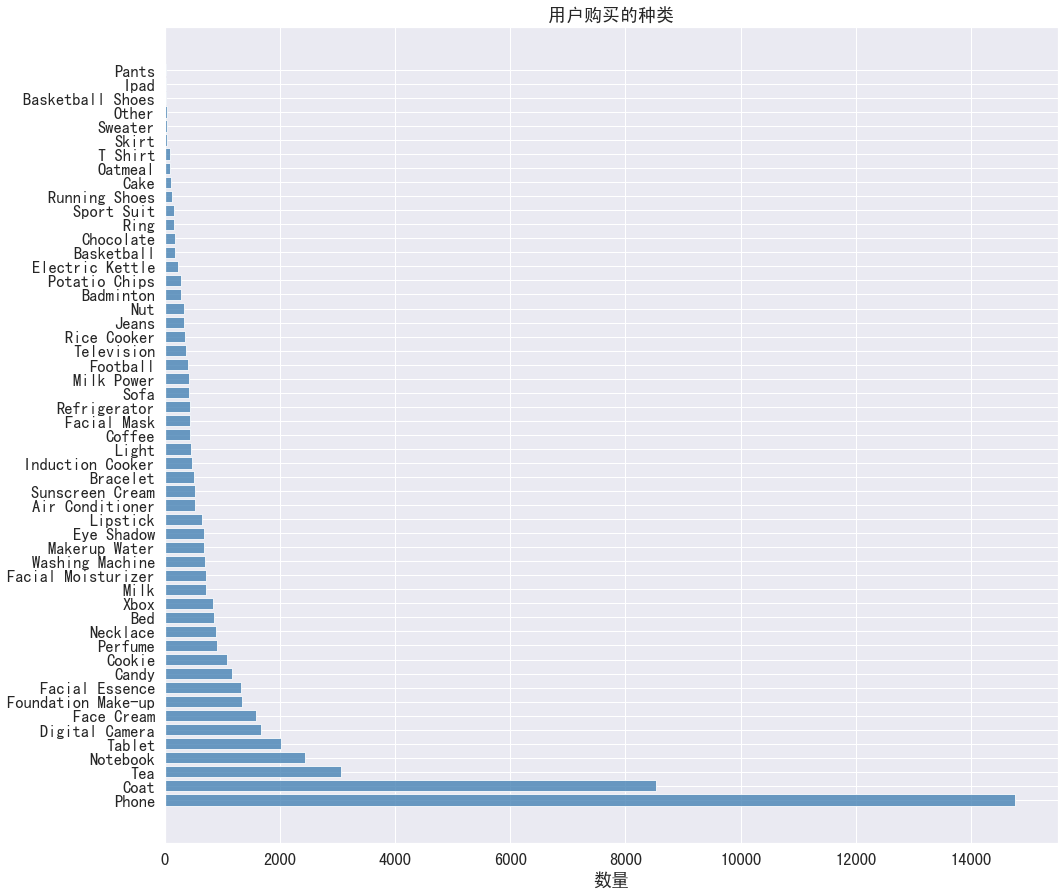

In [200]:
plt.figure(figsize=(16,15))
plt.barh(sh_cate.index, sh_cate, align = 'center',color='steelblue', alpha = 0.8)
plt.xlabel('数量')
plt.title('用户购买的种类')

用户购买的种类里，手机和外套是最多的，这两者肯定是首先推广。

In [143]:
sh_shop = short['shop_category'].value_counts()
sh_shop

Electronics                    21745
Clothes                         9106
Beauty Makeup                   8837
Food                            7473
Household Eletric Appliance     3076
Furniture                       1746
Jewellery Accessories           1560
Outdoor Sports                  1184
Mother and Infant                421
Name: shop_category, dtype: int64

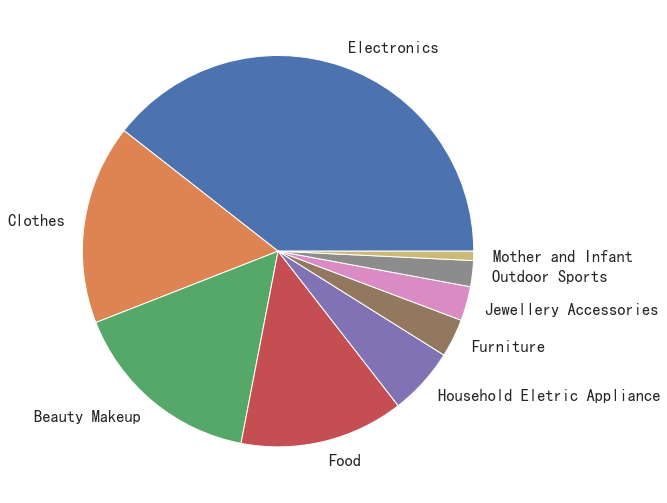

In [144]:
plt.figure(figsize=(16,9))
plt.pie(sh_shop,labels=sh_shop.index)
plt.show()

相对于品牌和物品，在商店这一部分，看到除衣服和电子产品之外，beauty makeup 和 food 也有很高的占比，分析可得，用户在这两个种类中的关注度也很高，建议在这两个部分加大推广，增强用户粘性。

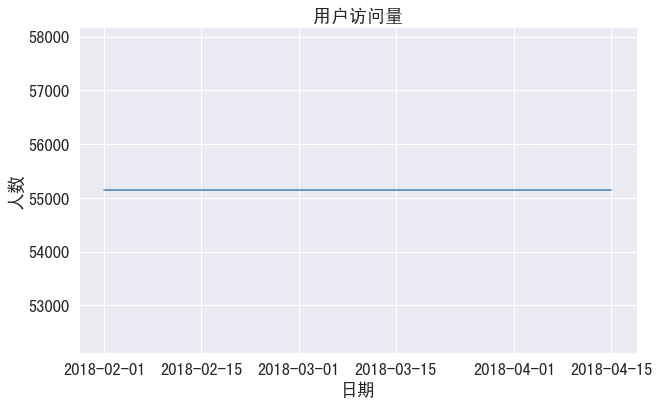

In [202]:
fig = plt.figure(figsize=(10,6))
sns.lineplot(short.date, 
         short.customer_id.count(), 
         color = 'steelblue'
        )
plt.title('用户访问量')
plt.xlabel('日期')
plt.ylabel('人数')
plt.show()

In [155]:
short_ty=pd.pivot_table(columns='type',index='date',data=short,values='customer_id',aggfunc=np.size)

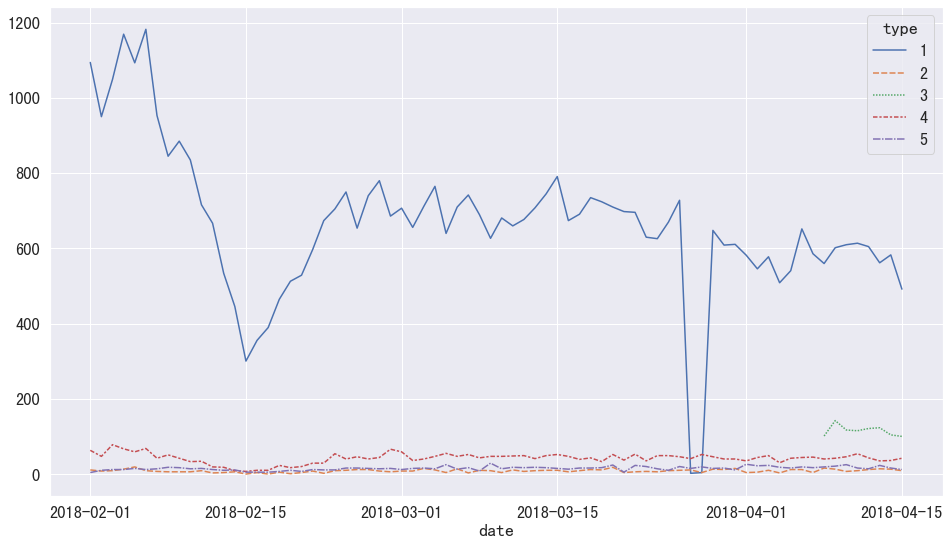

In [158]:
plt.figure(figsize=(16,9))
sns.lineplot(data=short_detail)
plt.show()

type：类别 1：浏览, 2：收藏, 3：购买, 4：加入购物车, 5：评论
从图中可以看出，用户的浏览量变化没有明显的规律，只是在3月底的有骤降，因时间周期短，故不做主要影响因素。其他的类型基本保持平稳。
在图中还看到，用户在整个时间周期中，从四月开始发生交易，分析得在前期因为临近春节，物流放假，故没有产生交易。
四月初开始出现交易，分析1、物流恢复2、推出了某活动，吸引顾客

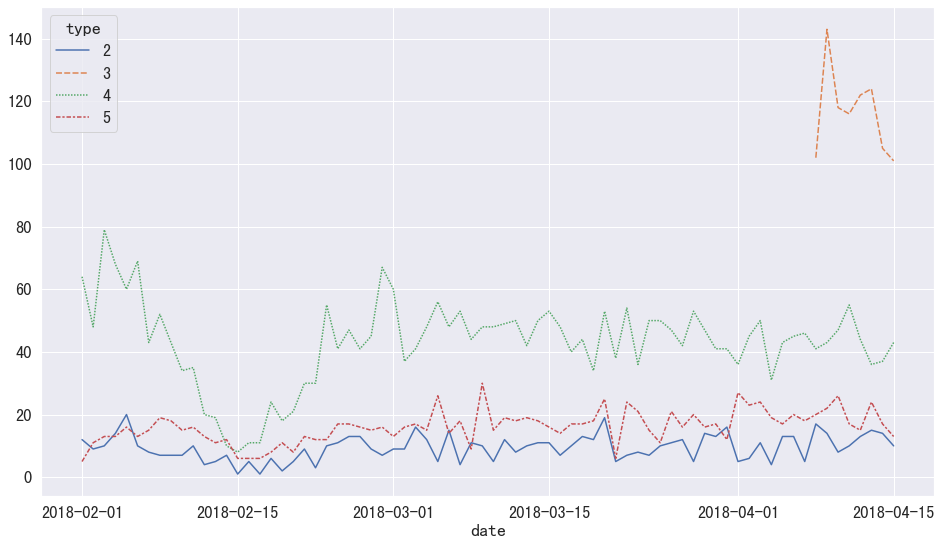

In [159]:
plt.figure(figsize=(16,9))
sns.lineplot(data=short_detail.iloc[:,1:])
plt.show()

In [165]:
sh_cus = short['customer_id'].value_counts()
sh_pro = short['product_id'].value_counts()
print(sh_cus)
print(sh_pro)

480586     19
1298059    16
734657     16
86807      13
1290750    12
           ..
1011695     1
701889      1
1132110     1
1294705     1
949931      1
Name: customer_id, Length: 49003, dtype: int64
248051    257
31583     103
258625    101
289214     85
344088     83
         ... 
290827      1
228716      1
280252      1
12879       1
35185       1
Name: product_id, Length: 25061, dtype: int64


In [166]:
sns.lineplot(data=sh_cus)
plt.show()

KeyboardInterrupt: 

In [203]:
from matplotlib.font_manager import FontProperties